# TODO

Reviews:
* The system consists of 7 biochemical species
* The data array is a 3D tensor

In [1]:
import sys
sys.path.append("./source")
from train import *
from predict import *
from model import *
import pickle

In [2]:
# load data
with open('./data/cell_cycle.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    
data_array = data_dict['data']
time_points = data_dict['t']
print(data_array.shape)

(1, 7500, 7)


In [3]:
help(lmmNet)

Help on class lmmNet in module model:

class lmmNet(builtins.object)
 |  lmmNet(h, X, M, scheme, hidden_units)
 |  
 |  A feed-forward Neural Network with one hidden layer embedded in the framework of linear multistep method.
 |  This model learns full dynamics of a dynamical system and can predict the derivatives at any point.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, h, X, M, scheme, hidden_units)
 |      Args:
 |      h -- step size
 |      X -- data array with shape S x N x D 
 |      M -- number of LMM steps
 |      scheme -- the LMM scheme (either AB, AM, or BDF)
 |      hidden_units -- number of units for the hidden layer
 |  
 |  get_F(self, X)
 |      Output of the NN/ML model.
 |      
 |      Args:
 |      - X: the data matrix with shape S x (N-M) x D
 |      
 |      Output:
 |      - F: the output dynamics with shape S x (N-M) x D
 |  
 |  get_Y(self, X)
 |      The linear difference (residual) operator.
 |      
 |      Args:
 |      - X: the data matrix with

In [7]:
# train the model

epochs = 10000
step_size = time_points[1] - time_points[0]
net = lmmNet(step_size, data_array, M = 1, scheme='AM', hidden_units=256) # use trapezoidal rule (smallest error constant that is also stable)
net.train(epochs)

In [8]:
# Solve the initial value problem given initial concentrations

predicted_traj = odeint(lambda x, t: predict_fn(x, t, net), data_array[0, 0,:], time_points)

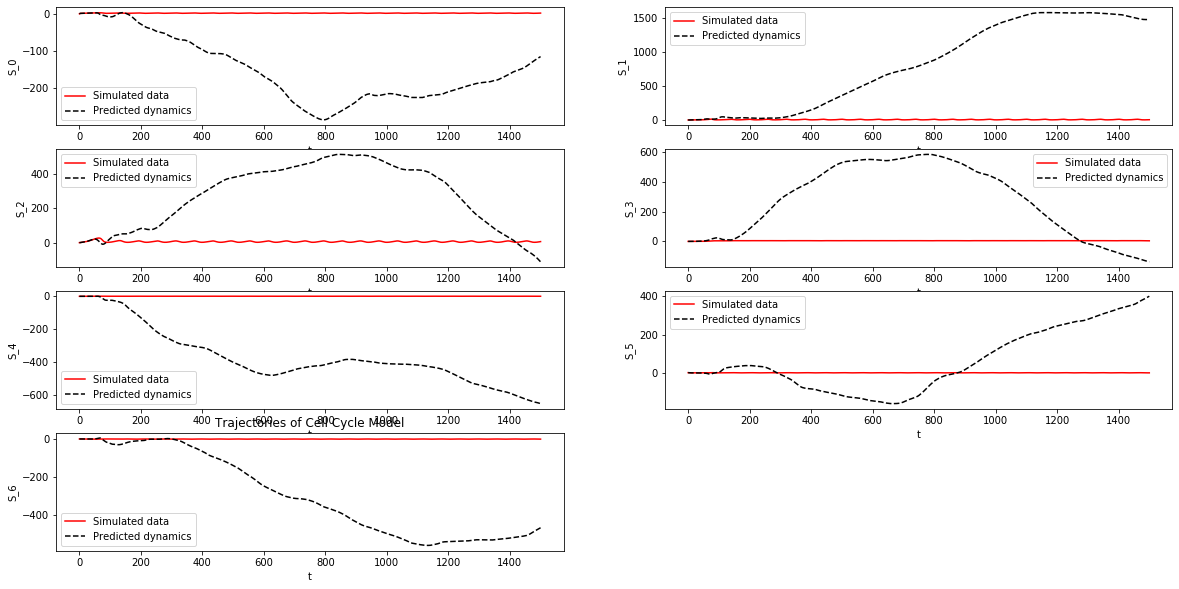

In [11]:
import matplotlib.pyplot as plt

# plot and compare the predicted and true dynamics

plt.figure(figsize=(20, 10))
plt.title('Trajectories of Cell Cycle Model')

for species in range(7):
    plt.subplot(4,2,species + 1)
    plt.plot(time_points, data_array[0, :, species], 'r-', label='Simulated data')
    plt.plot(time_points, predicted_traj[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.show()

Now try to use a different step size.

In [4]:
from NovakTyson import *
import matplotlib.pyplot as plt

In [6]:
# train the model
time_points, data_array = simulate_custom(step_size=0.3)

epochs = 10000
step_size = time_points[1] - time_points[0]
net = lmmNet(step_size, data_array, M = 1, scheme='AM', hidden_units=256, debug=False) # use trapezoidal rule (smallest error constant that is also stable)
net.train(epochs)

# Solve the initial value problem given initial concentrations
predicted_traj = odeint(lambda x, t: predict_fn(x, t, net), data_array[0, 0,:], time_points)

Epoch: 0, Time: 0.12, Loss: 3.4550e-01
Epoch: 100, Time: 5.82, Loss: 5.2811e-03
Epoch: 200, Time: 11.90, Loss: 2.2815e-03
Epoch: 300, Time: 18.60, Loss: 1.4140e-03
Epoch: 400, Time: 24.33, Loss: 9.8995e-04
Epoch: 500, Time: 30.07, Loss: 7.1976e-04
Epoch: 600, Time: 35.76, Loss: 5.3556e-04
Epoch: 700, Time: 41.49, Loss: 4.0973e-04
Epoch: 800, Time: 47.35, Loss: 3.2504e-04
Epoch: 900, Time: 53.31, Loss: 2.6800e-04
Epoch: 1000, Time: 59.12, Loss: 2.2847e-04
Epoch: 1100, Time: 64.84, Loss: 1.9947e-04
Epoch: 1200, Time: 70.48, Loss: 1.7679e-04
Epoch: 1300, Time: 76.12, Loss: 1.5830e-04
Epoch: 1400, Time: 81.77, Loss: 1.4274e-04
Epoch: 1500, Time: 87.40, Loss: 1.2942e-04
Epoch: 1600, Time: 93.08, Loss: 1.2306e-04
Epoch: 1700, Time: 98.75, Loss: 1.0749e-04
Epoch: 1800, Time: 104.39, Loss: 9.8398e-05
Epoch: 1900, Time: 110.04, Loss: 1.2311e-04
Epoch: 2000, Time: 115.76, Loss: 8.2924e-05
Epoch: 2100, Time: 121.41, Loss: 1.0061e-04
Epoch: 2200, Time: 127.39, Loss: 7.0434e-05
Epoch: 2300, Time: 1

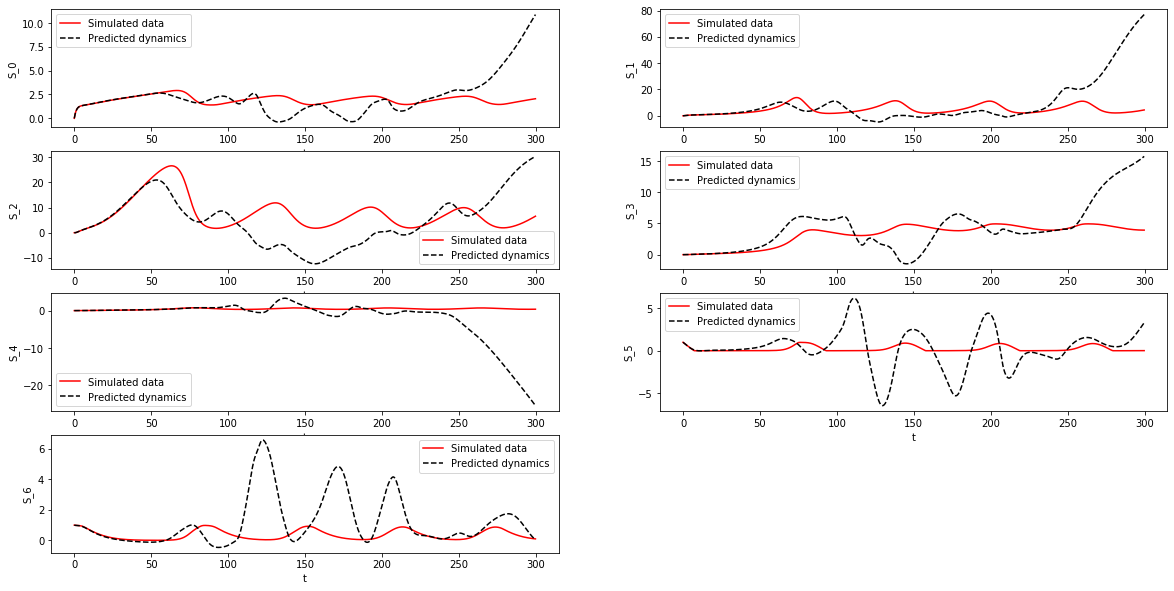

In [8]:
# plot and compare the predicted and true dynamics

plt.figure(figsize=(20, 10))
plt.title('Trajectories of Cell Cycle Model')

for species in range(7):
    plt.subplot(4,2,species + 1)
    plt.plot(time_points, data_array[0, :, species], 'r-', label='Simulated data')
    plt.plot(time_points, predicted_traj[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.show()

In [10]:
# train the model
time_points, data_array = simulate_custom(step_size=0.4)

epochs = 10000
step_size = time_points[1] - time_points[0]
net = lmmNet(step_size, data_array, M = 1, scheme='AM', hidden_units=256) # use trapezoidal rule (smallest error constant that is also stable)
net.train(epochs, debug=False)

# Solve the initial value problem given initial concentrations
predicted_traj = odeint(lambda x, t: predict_fn(x, t, net), data_array[0, 0,:], time_points)

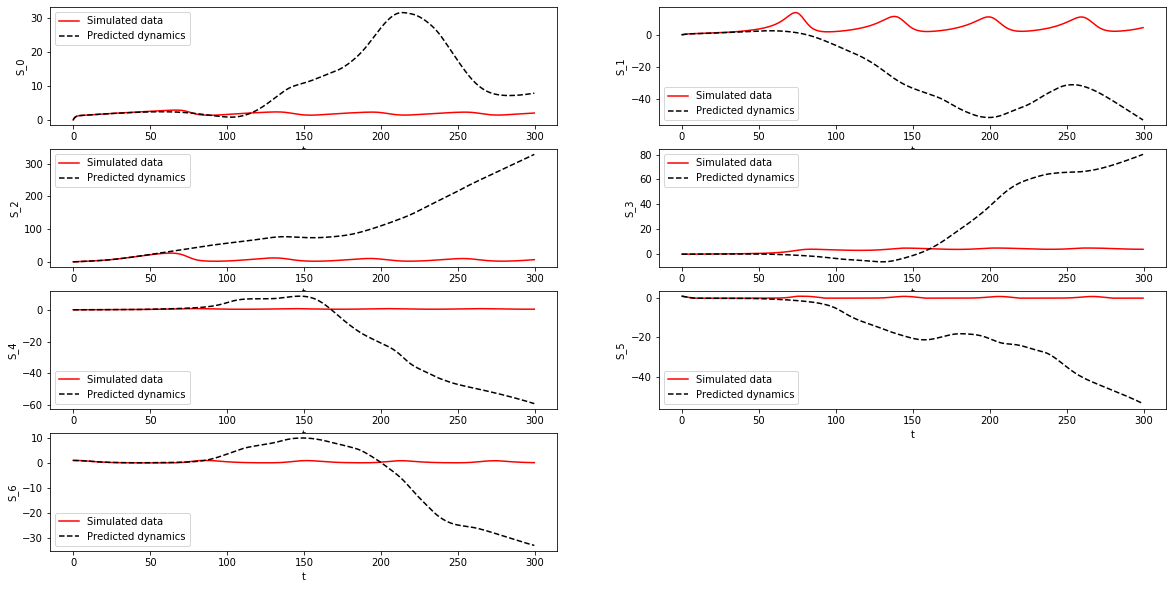

In [11]:
# plot and compare the predicted and true dynamics

plt.figure(figsize=(20, 10))
plt.title('Trajectories of Cell Cycle Model')

for species in range(7):
    plt.subplot(4,2,species + 1)
    plt.plot(time_points, data_array[0, :, species], 'r-', label='Simulated data')
    plt.plot(time_points, predicted_traj[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.show()

In [12]:
# train the model
time_points, data_array = simulate_custom(step_size=0.5)

epochs = 10000
step_size = time_points[1] - time_points[0]
net = lmmNet(step_size, data_array, M = 1, scheme='AM', hidden_units=256) # use trapezoidal rule (smallest error constant that is also stable)
net.train(epochs, debug=False)

# Solve the initial value problem given initial concentrations
predicted_traj = odeint(lambda x, t: predict_fn(x, t, net), data_array[0, 0,:], time_points)

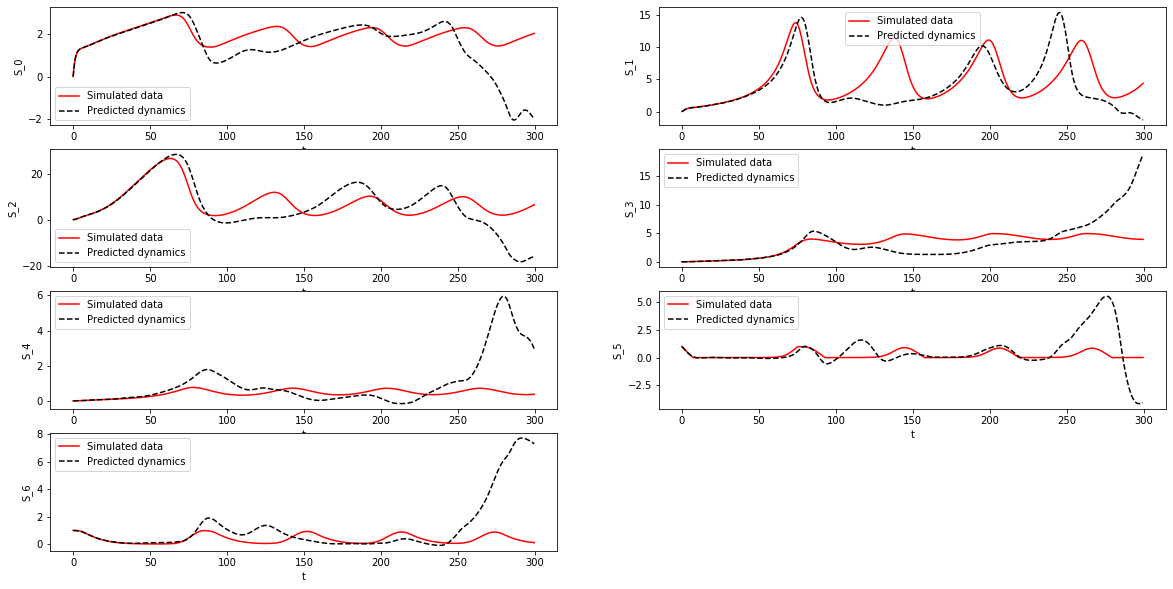

In [13]:
# plot and compare the predicted and true dynamics

plt.figure(figsize=(20, 10))
plt.title('Trajectories of Cell Cycle Model')

for species in range(7):
    plt.subplot(4,2,species + 1)
    plt.plot(time_points, data_array[0, :, species], 'r-', label='Simulated data')
    plt.plot(time_points, predicted_traj[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.show()

In [14]:
# train the model
time_points, data_array = simulate_custom(step_size=1.5)

epochs = 10000
step_size = time_points[1] - time_points[0]
net = lmmNet(step_size, data_array, M = 1, scheme='AM', hidden_units=256) # use trapezoidal rule (smallest error constant that is also stable)
net.train(epochs, debug=False)

# Solve the initial value problem given initial concentrations
predicted_traj = odeint(lambda x, t: predict_fn(x, t, net), data_array[0, 0,:], time_points)

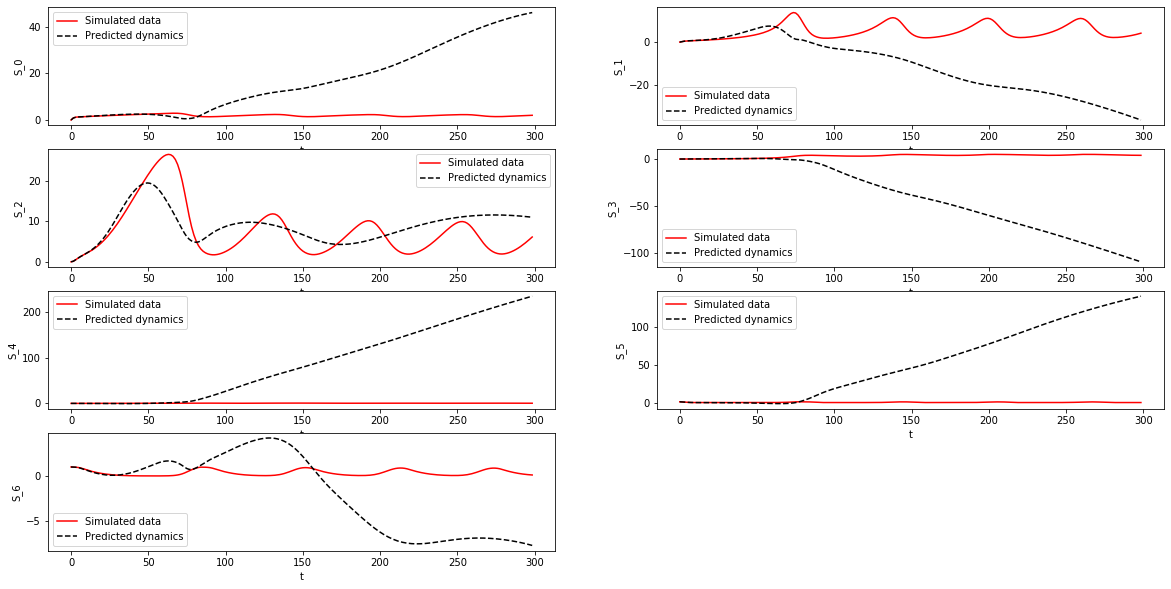

In [15]:
# plot and compare the predicted and true dynamics

plt.figure(figsize=(20, 10))
plt.title('Trajectories of Cell Cycle Model')

for species in range(7):
    plt.subplot(4,2,species + 1)
    plt.plot(time_points, data_array[0, :, species], 'r-', label='Simulated data')
    plt.plot(time_points, predicted_traj[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.show()

In [16]:
# train the model
time_points, data_array = simulate_custom(step_size=0.6)

epochs = 10000
step_size = time_points[1] - time_points[0]
net = lmmNet(step_size, data_array, M = 1, scheme='AM', hidden_units=256) # use trapezoidal rule (smallest error constant that is also stable)
net.train(epochs, debug=False)

# Solve the initial value problem given initial concentrations
predicted_traj = odeint(lambda x, t: predict_fn(x, t, net), data_array[0, 0,:], time_points)

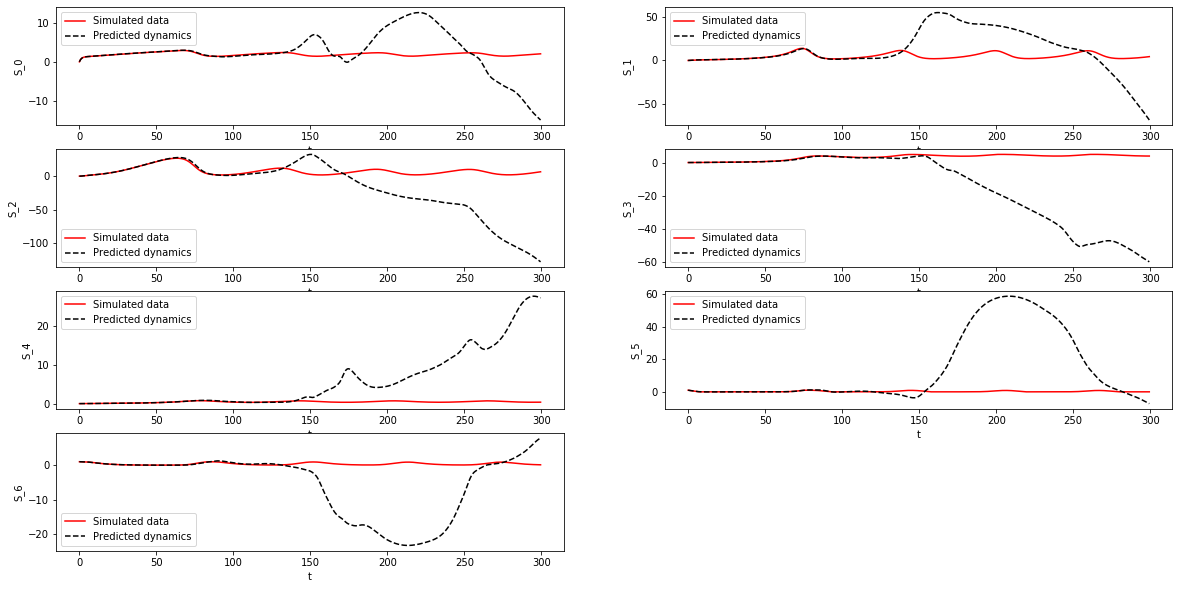

In [17]:
# plot and compare the predicted and true dynamics

plt.figure(figsize=(20, 10))
plt.title('Trajectories of Cell Cycle Model')

for species in range(7):
    plt.subplot(4,2,species + 1)
    plt.plot(time_points, data_array[0, :, species], 'r-', label='Simulated data')
    plt.plot(time_points, predicted_traj[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.show()